Data Science Dojo <br/>
Copyright(c) 2016 - 2019 <br/>

---

**Exercise:** Sentiment Analysis and Text Classification using Naive Bayes, Support Vector Machine and Logistic Regression <br/>
**Level:** Intermediate <br/>
**Expected time to complete:** 2 hours <br/>

# Sentiment Analysis with Sentiment140

## Data Source
Sentiment140

Sentiment140 started as a class project from Stanford University.
The Twitter Search API was used to collect these tweets by using keyword search. The approach is described in this __[paper](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf)__.

The data can be downloaded from the following link:<br/>
__[Sentiment140](https://docs.google.com/file/d/0B04GJPshIjmPRnZManQwWEdTZjg/edit)__

#### Format of the Data

The data is a CSV with emoticons removed. Data file format has 6 fields:<br/>
0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)<br/>
1 - the id of the tweet (2087)<br/>
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)<br/>
3 - the query (Lyx). If there is no query, then this value is NO_QUERY.<br/>
4 - the user that tweeted (robotickilldozr)<br/>
5 - the text of the tweet (Lyx is cool)<br/>

## What is Sentiment Analysis?

Let's use some imagination here! Put yourself in the shoes of a machine that is built and run by a bunch of humans. The way humans communicate with each other is totally alien to the machine since human language is complex for a machine to comprehend. That is why machines need to be taught to understand human language in order for them to assist humans in their routine tasks involving language.

Humans are fairly intutive when it comes to understanding and interpreting the tone of a piece of text since they have been trained to listen to that type of tone or piece of writing for all of their lives.

Let's consider the following sentence: **"Don't bother me. I'm living happily ever after."** Most humans will be able to pick up the sarcasm in this sentence since we know that nobody who is acutally happy will use a rude tone to convey this to somebody else. By using the contextual understanding which they have been taught earlier in life, humans can identify that this sentence is of a negative sentiment.

If we think from the perspective of a machine, a machine might associate this sentence with a positive sentiment since it contains the word "happily". Hence, we break the human language into a form which is understandable by machines, otherwise a machine cannot deduce the emotions such as happy, angry, frustrated, and sad.

So now we understand the importance of contextual understanding and tone when it comes to sentiment analysis and natural language processing, in general. The whole process of making a machine understand and analyse various tones and grammatical nuances in a language is a difficult process. It requires a certain set of steps before it is able to interpret the meaning correctly.

## Why Would You Want to Use Sentiment Analysis? 

#### Scenario
You are the marketing head of a brand that provides customized services in accordance with the preferences of their customers. The marketing platform is based online. It's been quite some time since you have been in the marketing field but you want to take your service one notch higher. So you do intensive research to integrate technology into your marketing plan and come up with the following ideas:
 - You can use the data from Twitter's platform to track your customers and target them using their sentiments and emotions about a product or a service over time.
 - You can track and record user feedback related to a service by finding the emotions of a tweet relating to that service.
 - You can identify your customer base and focus on those customers individually.
 
Before you use all this information and integrate it with your marketing strategy, you decide to learn and brush up on the skills and techiques that are used to perform sentiment analysis and natural language processing. In this tutorial we will learn the tools to build a model to classify the emotional state of a single tweet.

## Packages
The following packages should be installed through the command line: <br/>
 - **Node.js:** Should be installed to include any jupyterlab extensions
 - **pip install ipywidgets:** For jupyter lab extensions
 - **pip install qgrid :** An interface for displaying a dataframe
 - **For jupyter lab:**
      - jupyter labextension install @jupyter-widgets/jupyterlab-manager
      - jupyter labextension install qgrid
 - **pip install nltk:** Natural Language Processing Toolkit

In [1]:
# All the libraries are imported from this seperate file
from util import *
import warnings
#Suppress warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

By default, the dataset does not contain the column names in the csv file so we will add the column names while loading the dataset.

In [2]:
cols = ['Polarity','Id','Date','Query','User','Text']
train  = pd.read_csv('Sentiment140/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",header=None,names = cols)
test = pd.read_csv('Sentiment140/testdata.manual.2009.06.14.csv',encoding = "ISO-8859-1",header=None,names = cols)

In [3]:
print('Total Training Records: ',len(train))
print('Total Testing Records: ',len(test))

Total Training Records:  1600000
Total Testing Records:  498


Now we could simply load the dataframe using the `test.head()` command. However, `qgrid` lets you have an Excel-like table inside Jupyter Notebook/Lab, as it makes use of `ipywidgets`. This is extremely useful when you are trying to understand your data. Instead of typing a lot of code, you can sort your data with a click, or filter some data temporarily with one click. Let's see how amazing it is!

In [4]:
# Use the filter icon to filter or sort the dataset 
qg.show_grid(test)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Doesn't this look more presentable and easy to navigate?

## Text Preprocessing: Why Do We Need This?
 
As discussed before, we need to prepare our data to be analyzed by a machine learning model. To make this easy to understand let's look at the intution behind each and every single step.
 
 - The first pre-processing step is to transform our tweets into lower case. This avoids having multiple copies of the same words thereby reducing our training data and having the program accidentally treat the same word differently.
 - Do we need punctuation, special characters and numbers when we try to differentiate between the polarity/labels of the tweets? No. Examples: Twitter handles(@), semi colons, question marks, etc. This again reduces the amount of training data by removing noise and avoids accidentally treating the same word differently.
 - Do we need stopwords? We want to remove these often meaningless and frequently used words so that the model can focus on the important ones. Later on, we will look at a list of common stopwords.
 - As a final step, we will convert the string of tweets into tokens. By default, text on a computer is represented through string values. An integral step is to split the text into smaller units corresponding to the words of the language we are considering. In the context of NLP we often refer to these units as tokens. If you get this step wrong, all further steps will be affected. So hold on and be patient!


We will perform preprocessing on both the train and test data so we have all our data prepared for exploratory data analysis. Hence we merge both the sets at this point.

In [5]:
# ignore_index = True merges the index of both the dataframes so that we have only continuous index values
data = train.append(test, ignore_index=True)

In [6]:
# Use the filter icon to filter or sort the dataset 
qg.show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

#### Preprocessing Functions

**Regular Expressions:** A regular expression is a search pattern to find and extract any kind of information you are looking for or filter on. We will be using this idea to carry out the cleaning process. To brush up your skills on regular expressions you can refer to __[Regex](https://medium.com/@kells08/what-the-is-regex-bc2b3f63208)__

 - **to_lower:** Takes a string input and converts all the letters to lowercase.
 - **remove_pattern:** Uses regular expressions to filter out website links or other URLs from the tweets, as they aren't useful in identifying whether a tweet is positive or negative.
 - **remove_stopwords:** Uses a dictionary of stopwords collection to remove the stopwords which are in the training data. We first create a dictionary of stopwords using "Collections Library". This approach helps us do a very fast search (time = O(1)) rather than doing it on a list (time = O(stopwords)).
 -  **Punctuation:** Removes all punctuations except '#' (hash) in the tweets and replaces them with spaces. We are not removing hash since we will need this piece of information to later analyse different polarity of the tweets.

In [7]:
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

def to_lower(string):
    return string.lower()

def remove_pattern(text):
    string = r'www.[^ ]+'
    out = re.sub(string,'',text)
    string = r'https?://[^ ]+'
    out = re.sub(string,'',out)
    return out

def remove_stopwords(words):
    words = ' '.join([word for word in words if stopwords_dict[word]==0])
    return words

In [8]:
data['preprocessed'] = data['Text'].apply(to_lower)
data['preprocessed'] = data['preprocessed'].apply(remove_pattern)

In [9]:
# Split the string into a set of tokens
data['preprocessed'] = data['preprocessed'].apply(lambda x: x.split())

In [10]:
# The set of stopwords which will be removed from the data
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

 - Make sure to perform the stopwords removal step before removing punctuation otherwise "didn't" will become "didnt" after punctuation removal and since it isn't present in the stopwords dictionary so it cannot be removed.
 - We remove punctuation while we have the tweets in string form because we have a huge dataset to preprocess and this method is quite efficient thereby saving time!

In [11]:
data['preprocessed'] = data['preprocessed'].apply(remove_stopwords)
data['preprocessed'] = data['preprocessed'].str.replace("[^a-zA-Z#]", " ")

- We save both the string and tokenized version of the preprocessed text since we will be needing both later on with different models.
- Words with less than length 2 are removed from the dataset since they provide no significant meaning in differentiating between the sentiment of a tweet.

In [12]:
data['de_tokenized'] = data['preprocessed']

In [13]:
data['preprocessed'] = data['preprocessed'].apply(lambda x: x.split())
data['preprocessed'] = data['preprocessed'].apply(lambda x: [i for i in x if len(i) > 2])

- data['de_tokenized'] contains the string form of cleaned data. 
- data['preprocessed'] contains the tokenized form of cleaned data.

- There are 4 unecessary columns in the data which won't be used in our exploratory data analysis, so it is better to drop them from the data since we need to save up on the storage space and data loading.

In [14]:
data = data.drop(['Id', 'Date','Query','User'], axis=1)

In [15]:
# Saving the clean data to a csv file
data.to_csv("Sentiment140/preprocessed.csv",index=False)

In [7]:
# Loading cleaned data 
data = pd.read_csv('Sentiment140/preprocessed.csv')
qg.show_grid(data)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

#### Train-Test Split

- The train and test data were already split in the original format so we convert the data back to that format after preprocessing.

In [17]:
train_data = data[0:1600000]
test_data = data[1600000:]
print('Total Training Records: ',len(train_data))
print('Total Testing Records: ',len(test_data))

Total Training Records:  1600000
Total Testing Records:  498


In [18]:
# Saving the clean train and test data to a csv file
train_data.to_csv("Sentiment140/train_preprocessed.csv",index=False)
test_data.to_csv("Sentiment140/test_preprocessed.csv",index=False)

In [2]:
# Loading the data
train_data = pd.read_csv('Sentiment140/train_preprocessed.csv')
test_data = pd.read_csv('Sentiment140/test_preprocessed.csv')

In [3]:
# Provides us with summary of the data columns and types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 4 columns):
Polarity        1600000 non-null int64
Text            1600000 non-null object
preprocessed    1600000 non-null object
de_tokenized    1599814 non-null object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


- The training data has 2 classes. Both of them are balanced.
- The test data has 3 classes. We can see their respective counts.

In [5]:
train_data['Polarity'].value_counts()

4    800000
0    800000
Name: Polarity, dtype: int64

In [6]:
test_data['Polarity'].value_counts()

4    182
0    177
2    139
Name: Polarity, dtype: int64

- Now let's find the word count per tweet to see if there is any difference between the word count of positive and negative tweets.

In [7]:
def word_count(tweet):
    return len(tweet.split())
train_data['count'] = train_data['preprocessed'].apply(word_count)
train_data.head(3)

,Polarity,Text,preprocessed,de_tokenized,count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","['switchfoot', 'awww', 'that', 'bummer', 'shou...",switchfoot awww that s bummer shoulda got...,10
1,0,is upset that he can't update his Facebook by ...,"['upset', 'can', 'update', 'facebook', 'textin...",upset can t update facebook texting it migh...,12
2,0,@Kenichan I dived many times for the ball. Man...,"['kenichan', 'dived', 'many', 'times', 'ball',...",kenichan dived many times ball managed save ...,9


Text(0.5,1,'Word Count distribution for Positive and Negative Tweets')

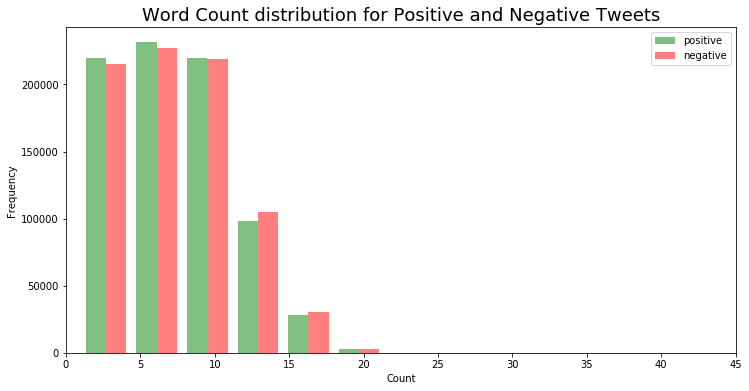

In [8]:
positive = train_data['count'][train_data.Polarity == 4]
negative = train_data['count'][train_data.Polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Count')
plt.ylabel('Frequency')
g = plt.hist([positive, negative], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')
plt.title('Word Count distribution for Positive and Negative Tweets', fontsize = 18)

#### Does the above histogram gives us any information?
 - We can observe that most of the processed tweets fall between 5-10 word count.
 - The minimum and maximum length for a tweet is 1 and 20 correspondingly. 
 - Most of the training set contains all the different lengths of tweets. The distribution is balanced. 
 - The difference between the count of positive and negative tweets isn't significant across the dataset. So this doesn't give us any new insight with respect to polarity of the tweet.

 - Now we see the frequency distribution of the words in the training data which lists the top words used in the text. This gives us a rough idea about the topic being discussed in the text. Since the tweets are random and can comprise of many different topics, we can expect several random subjects being discovered.
 - We will use the frequency distribution function from the nltk toolkit to execute this task.

In [9]:
tokens = train_data['preprocessed']
vocabulary = set(tokens)
print('Length is:',len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
print(sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:30])

Length is: 1544514
["['work']", '[]', "['good', 'morning']", "['headache']", "['tired']", "['goodnight']", "['raining']", "['bored']", "['homework']", "['tummy', 'hurts']", "['back', 'work']", "['isplayer', 'died', 'sorry']", "['cold']", "['nothing']", "['miss']", "['feeling', 'well']", "['feel', 'good']", "['head', 'hurts']", "['getting', 'ready', 'work']", "['good', 'morning', 'everyone']", "['sad']", "['woke']", "['happy', 'mother', 'day']", "['happy', 'mothers', 'day']", "['home']", "['going', 'work']", "['cant', 'sleep']", "['love']", "['bad', 'day']", "['tummy', 'ache']"]


#### Observations
- It is evident that the time during which the tweets were collected was around the time period of Mother's Day since this topic appeared in the tweets quite often.
- Other words show us the daily emotions of people and greetings which they communicate through the tweets to their friends circle. This involves "sad", " good morning", "goodnight", "feel good" and so on. We can definitely use these keywords to seperate positive and negative sentiments.

 - We use wordcloud to create word clouds, where size of each word is proportional to its frequency in the text for both negative and positive sentiments.

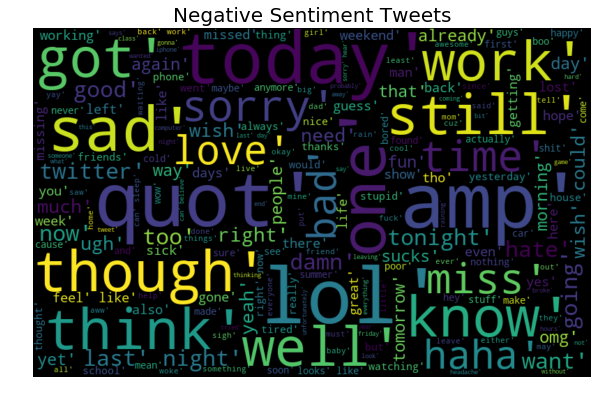

In [11]:
words =' '.join([text for text in train_data['preprocessed'][train_data['Polarity'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Negative Sentiment Tweets', fontsize = 20)
plt.axis('off')
plt.show()

From the above wordcloud we can see that the following words are used in a negative sentiment context:
- Sad
- Love
- Sucks
- Damn
- Ugh
- Sorry

This makes sense because these words are mostly used in a negative sentiment context, except for the word love. Love can be used in both positive and negative ways, depending on the context.

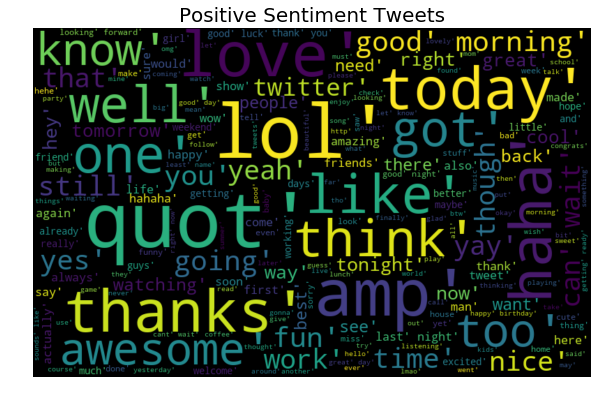

In [12]:
words =' '.join([text for text in train_data['preprocessed'][train_data['Polarity'] == 4]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Positive Sentiment Tweets', fontsize = 20)
plt.axis('off')
plt.show()

From the above wordcloud we can see that the following words are used in a positive sentiment context:
- awesome
- fun
- friends
- nice
- happy
- lol

This makes sense because these words are mostly used in a positive sentiment context.

- While preprocessing the text, we left out the hash ('#') in the tweets. Now it's time to use these hashtags to observe the trends on Twitter in the context of positive and negative tweets!
- We select the top 10 hashtags and display them.

In [13]:
def hashtags(tweet):
    ht = []
    # Loop over the words in the tweet
    for i in tweet:
        tag = re.findall(r"#(\w+)", i)
        ht.append(tag)
    return ht

In [23]:
#positive
pos = hashtags(train_data['preprocessed'][train_data['Polarity'] == 4])
#negative
neg = hashtags(train_data['preprocessed'][train_data['Polarity'] == 0])
pos = sum(pos,[])
neg = sum(neg,[])

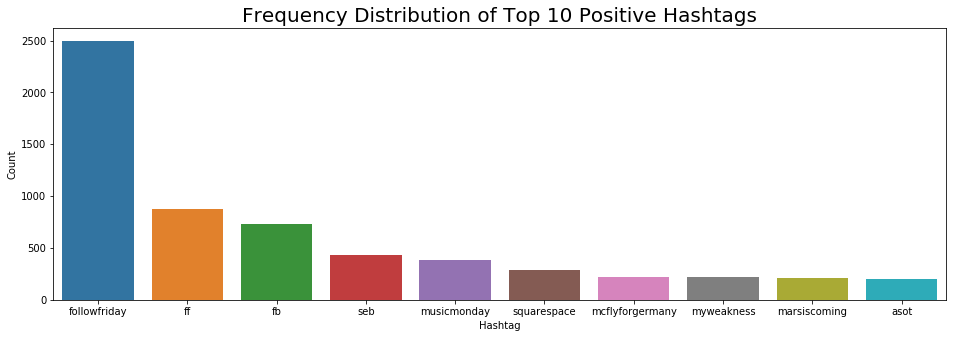

In [16]:
pos_freq = nltk.FreqDist(pos)
pos_freq = pd.DataFrame({'Hashtag': list(pos_freq.keys()),'Count': list(pos_freq.values())})    
pos_freq = pos_freq.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=pos_freq, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Frequency Distribution of Top 10 Positive Hashtags', fontsize= 20)
plt.show()

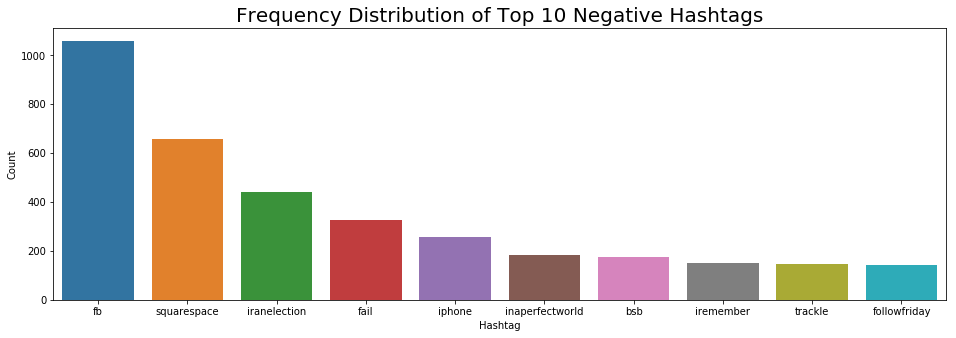

In [27]:
neg_freq = nltk.FreqDist(neg)
neg_freq = pd.DataFrame({'Hashtag': list(neg_freq.keys()),'Count': list(neg_freq.values())})    
neg_freq = neg_freq.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=neg_freq, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title('Frequency Distribution of Top 10 Negative Hashtags', fontsize= 20)
plt.show()

#### Observations

 - **Positive Hashtags:** 'followfriday/ff' is the top most frequent hashtag. A hashtag related to music which is 'musicmonday' is also categorized into positive hashtags.
 - **Negative Hashtags:** 'iranelection' is used in a negative context. This makes sense because generally around election time there is a lot of hate speech that spreads around social media.
 - The Facebook hashtag 'fb' is used in both contexts which means that people associate this social networking platform with both positive and negative sentiments in different contexts.
 - We now know that these hashtags are a crucial part of the tweets since they help us in identifying whether a topic being discussed in the tweet is of negative or positive emotion.

Let's dive into the frequency distribution of the words across positive and negative tweets!
- We will use `CountVectorizer` to calculate the frequency distribution of the words in the data. We will fit the vectorizer using the training data and then use it later on to transform the data into counts. 

In [29]:
cv = CountVectorizer()
cv.fit(train_data.preprocessed)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

- We will create a dataframe containing the counts of words used in both negative and positive context. These will be used for bar plots later on.

In [30]:
#This gives us a sparse matrix with rows = number of words and number of columns = number of features
pos = cv.transform(train_data[train_data.Polarity == 4].preprocessed)
neg = cv.transform(train_data[train_data.Polarity == 0].preprocessed)
# 1d matrix
pos_tf = np.sum(pos,axis=0)
neg_tf = np.sum(neg,axis=0)
pos = np.squeeze(np.asarray(pos_tf))
neg = np.squeeze(np.asarray(neg_tf))

In [44]:
freq_df = pd.DataFrame([neg,pos],columns=cv.get_feature_names()).transpose()
freq_df.columns = ['negative', 'positive']
# Total word count
freq_df['total'] = freq_df['negative'] + freq_df['positive']
freq_df.sort_values(by='total', ascending=False).iloc[:20]

,negative,positive,total
good,29220,62143,91363
day,41480,48367,89847
get,45618,36569,82187
like,41061,37530,78591
quot,26154,45896,72050
today,38119,30100,68219
work,45484,19563,65047
love,17126,47856,64982
going,33690,30940,64630
got,33416,28044,61460


- From the above dataframe, we can see that the word 'good' is used 29220 times in a negative context and 62143 times in a positive context. This pattern can be seen for all the other words, too. 
- We can see that there are a lot of words which are used in both contexts. However, if a certain word is used in a positive context more times than negative, then the probability of it being positive is high. For example, the word 'good' is used 62143 times in the context of positive and 29220 in the context of negative. So if we see a tweet with the word 'good', it is highly likely that the sentiment for that tweet is positive.

Text(0.5,1,'Top 30 Tokens in Negative Tweets')

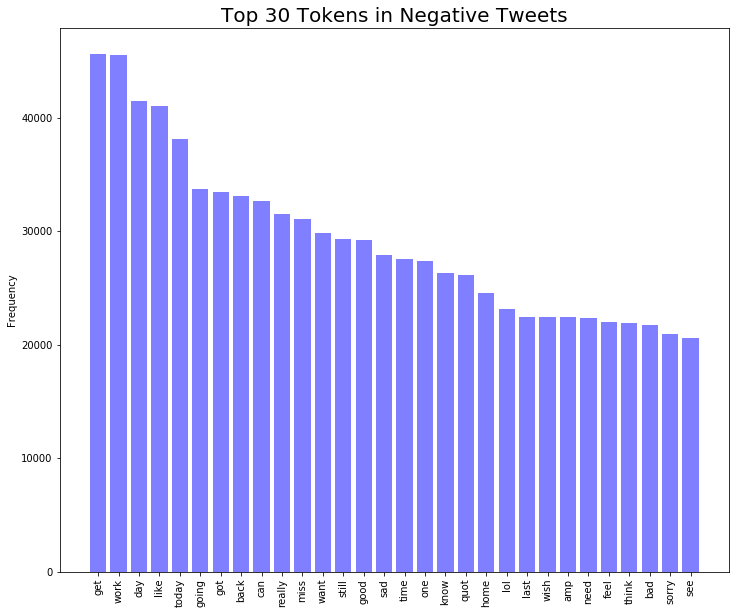

In [55]:
y_pos = np.arange(30)
plt.figure(figsize=(12,10))
plt.bar(y_pos,freq_df.sort_values(by='negative',ascending=False)['negative'][:30],align='center', alpha=0.5, color = 'b')
plt.xticks(y_pos, freq_df.sort_values(by='negative',ascending=False) ['negative'][:30].index,rotation='vertical')
plt.ylabel('Frequency')
plt.title('Top 30 Tokens in Negative Tweets',fontsize = 20)

Text(0.5,1,'Top 30 Tokens in Positive Tweets')

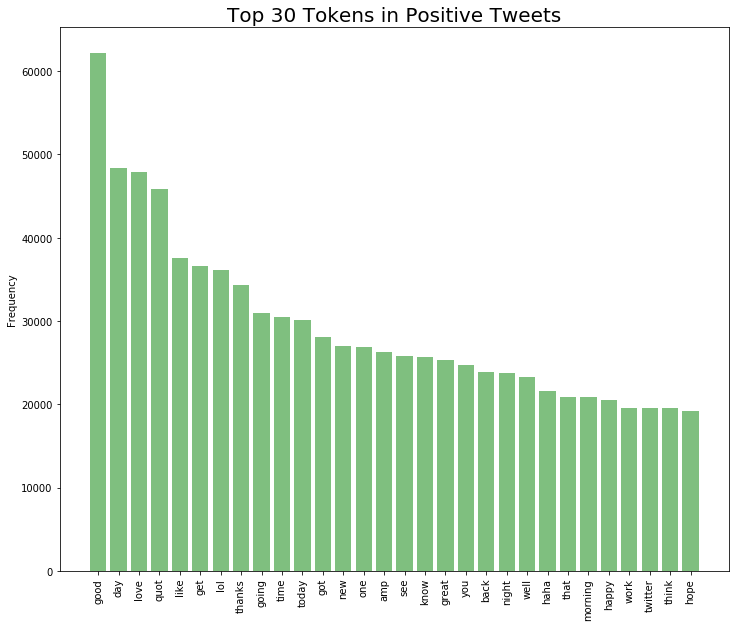

In [54]:
y_pos = np.arange(30)
plt.figure(figsize=(12,10))
plt.bar(y_pos, freq_df.sort_values(by='positive',ascending=False)['positive'][:30],align='center',alpha=0.5, color = 'g')
plt.xticks(y_pos,freq_df.sort_values(by='positive',ascending=False)['positive'][:30].index,rotation='vertical')
plt.ylabel('Frequency')
plt.title('Top 30 Tokens in Positive Tweets',fontsize = 20)

 - The bar plots are intutive in representing the words that are more probable to appear in the context of one type of sentiment over another. It is more likely that you will see 'happy' in the context of positive tweets and 'sad' in negative tweets.

## Feature Engineering and Model Building

Now it's time to convert each tweet, which is represented by a list of tokens, into a vector that a machine learning model can understand. There are several ways to perform this task. Let's look at one of the most common ways!


#### Bag Of Words

 - In this approach, we use the tokenized words for each tweet and find out the frequency of each token.
Each tweet is treated as a separate document and we make a list of unique words from all the tweets.
- For each tweet a vector is created with the length as the total number of unique words from all the tweets. The vector represents the count of those unique words in that particular tweet **ONLY**.
- `CountVectorizer` works on Terms Frequency, i.e. counting the occurrences of tokens and building a sparse matrix of size = number of tweets x number of unique words.

**Pros:** 
 - The main advantage of the bag of words approach is that we dont need a huge dataset to get good results. 
 - This model does not require much computation. Hence it's simple.

**Cons:**
 - Huge sparse matrix is created as a result which consumes alot of memory and space since the length of a single vector is equal to the number of unique words in the whole dataset. If there are a lot of words in the whole dataset, with many that do not overlap in the tweets, there are going to be many zero counts.
 - This approach does not care about the order in which the words appear thereby ignoring the context in which the words are being used. As we have seen before, there are a lot of words which are common in both the sentiments but in these cases the additional information such as context helps us in differentiating between them.


- To learn more about text analytics and pre-processing text you can head over to **Text Analytics Fundamentals - DSDZ207 Course** and check out the resources!

#### Train and Test Data

In [106]:
X_train = train_data['preprocessed']
y_train = train_data['Polarity']
X_test = test_data['preprocessed']
y_test = test_data['Polarity']
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1600000,)
X_test (498,)
y_train (1600000,)
y_test (498,)


In [105]:
# Store the results of different models to draw a comparison later on
models = ['NB','LR','SVM']
accuracies =[] 
mse = []
f1_score = []

**Parameters of CountVectorizer:** <br/>
The following parameters can be tweaked in accordance with different datasets to see how the model performs.<br/>
**stop_words**: Ignores stopwords <br/>
**max_features**: Integer (number of features to return) <br/>
**max_df**: Removes terms that appear too frequently <br/>
**max_df** = 0.50: Ignores terms that appear in 50% of the documents <br/>
**min_df**: Removes terms that appear too infrequently <br/>
**min_df** = 0.01: Ignores terms that appear in 1% of the documents <br/>
**ngram_range** = N-gram: Refers to a contiguous sequence of n words. Can help maintain the contextual meaning. However, beware of the fact that the size of the feature set grows exponentially with too many n-grams.

In [107]:
bow_vectorizer = CountVectorizer(stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit(X_train)
features_train = bow.transform(X_train)
features_test = bow.transform(X_test)
print(features_train.shape)

(1600000, 552992)


- Classification Report gives us the Precision, Recall and the F1-Score of the model<br/>
- Since our goal is to recognize both positive and negative sentiment tweets, the ones we correctly classified as positive or negative are our True Positives/True Negatives, and the positive tweets we incorrectly classified as negative and vice versa are our False Negatives/False Positives.
- Our goal is to minimize both the False Negatives and False Positives. **(Type I and II Error)**
- The F1 score helps strike a balance between precision (positive tweets/negative tweets classified correctly over the total number of tweets predicted as positive/negaitve) and sensitivity/recall (the proportion of positive/negative classified correctly). For that reason, we will use the F1 metric as our optimization parameter on top of accuracy.
- Since in our case the distribution of positive and negative classes is well balanced, we can use accuracy to evaluate that how a model is performing.

#### Naive Bayes

- To learn more about this you can head over the **Naive Bayes - DSDZ233 Course**.

In [108]:
model = MultinomialNB().fit(features_train, y_train)
predicted = model.predict(features_test)
print(classification_report(predicted,y_test))
accuracy = model.score(features_test, y_test)
print('Naive Bayes Accuracy',accuracy*100,'%')
error = mean_squared_error(y_test, predicted)
print('MSE',error)
accuracies.append(accuracy)
mse.append(error)

              precision    recall  f1-score   support

           0       0.80      0.63      0.70       226
           2       0.00      0.00      0.00         0
           4       0.82      0.55      0.66       272

   micro avg       0.58      0.58      0.58       498
   macro avg       0.54      0.39      0.45       498
weighted avg       0.81      0.58      0.68       498

Naive Bayes Accuracy 58.43373493975904 %
MSE 3.3012048192771086


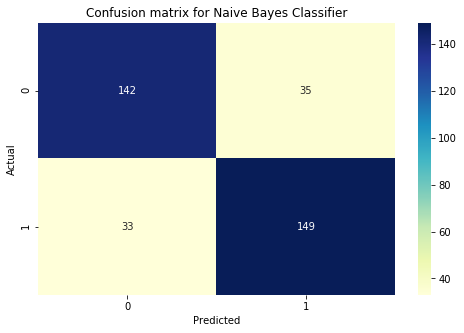

In [109]:
confusion_matrix = cm(y_test, predicted,[0,4])
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Naive Bayes Classifier')
plt.show()

#### Observations
Label 0 = Negative Tweet <br/>
Label 1 = Positive Tweet
- Accuracy = 58.43
- F1 Score = 0.70 for Negative class and 0.66 for Positive class
- False Positives = 33
- False Negatives = 35

#### Logistic Regression
 - To learn more about this you can head over the **Logistic Regression - DSDZ234 Course**.

**Parameters:** <br/>
Play around with the following parameters to check which combination of parameters works best for your model!<br/>
**Loss:** Log (For Logistic Regression)<br/>
**Penalty:** L1 or L2 (Lasso or Ridge Regularization)<br/> 
**n_iter:** Number of iterations with no improvement to wait before early stopping.<br/>
**alpha:** Constant that multiplies the regularization term. <br/>

In [110]:
final_model= SGDClassifier(loss='log', penalty='l1', alpha=1e-3, n_iter=5, random_state=42)
final_model.fit(features_train, y_train)
predicted= final_model.predict(features_test)
accuracy = final_model.score(features_test, y_test)
print(classification_report(predicted,y_test))
error = mean_squared_error(y_test, predicted)
print('Logistic Regression Accuracy',accuracy*100,'%')
accuracies.append(accuracy)
print('MSE',error)

              precision    recall  f1-score   support

           0       0.40      0.64      0.49       109
           2       0.00      0.00      0.00         0
           4       0.87      0.41      0.55       389

   micro avg       0.46      0.46      0.46       498
   macro avg       0.42      0.35      0.35       498
weighted avg       0.76      0.46      0.54       498

Logistic Regression Accuracy 45.78313253012048 %
MSE 5.325301204819277


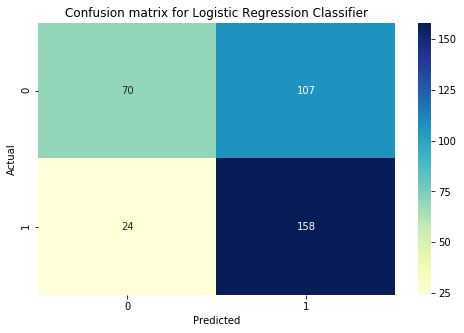

In [111]:
confusion_matrix = cm(y_test, predicted ,[0,4])
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Logistic Regression Classifier')
plt.show()

#### Observations
Label 0 = Negative Tweet <br/>
Label 1 = Positive Tweet
- Accuracy = 45.78%
- F1 Score = 0.49 for Negative class and 0.55 for Positive class
- False Positives = 24
- False Negatives = 107

#### Support Vector Machine

**Parameters :** <br/>
Play with the following parameters to check which combination of parameters works best for your model!<br/>
**Loss =** Hinge <br/>
**Penalty =** L1 or L2 (Lasso or Ridge Regularization)<br/>
**n_iter =** Number of iterations with no improvement to wait before early stopping.<br/>
**alpha =** Constant that multiplies the regularization term. <br/>

In [112]:
model= SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
model.fit(features_train, y_train)
predicted_svm = model.predict(features_test)
print(classification_report(predicted_svm,y_test))
accuracy = model.score(features_test, y_test)
error = mean_squared_error(y_test, predicted_svm)
print('SVM Accuracy',accuracy*100,'%')
print('MSE',error)
accuracies.append(accuracy)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       162
           2       0.00      0.00      0.00         0
           4       0.86      0.47      0.61       336

   micro avg       0.56      0.56      0.56       498
   macro avg       0.51      0.40      0.44       498
weighted avg       0.80      0.56      0.64       498

SVM Accuracy 55.62248995983936 %
MSE 3.751004016064257


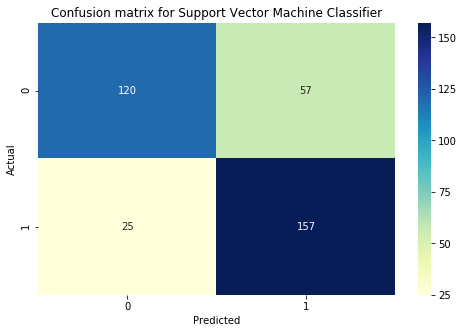

In [113]:
confusion_matrix = cm(y_test, predicted_svm ,[0,4])
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Support Vector Machine Classifier')
plt.show()

#### Observations
Label 0 = Negative Tweet <br/>
Label 1 = Positive Tweet
- Accuracy = 55.6%
- F1 Score = 0.71 for Negative class and 0.61 for Positive class
- False Positives = 25
- False Negatives = 57

##### Bag of Words with Various Classification Models

- From the above combination of models we can see that Naive Bayes performs the best with Bag of Words features, as the accuracy and the F1 score for this model is the highest amongst the other models.

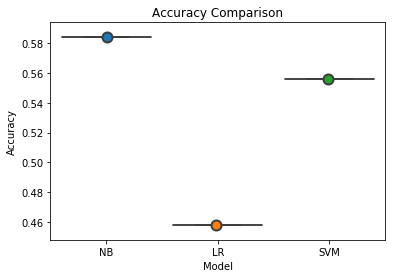

In [114]:
information = {'Model':models, 'Accuracy':accuracies}
data = pd.DataFrame(data=information)
sns.boxplot(x='Model', y='Accuracy', data=data)
sns.stripplot(x='Model', y='Accuracy', data=data, size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Accuracy Comparison')
plt.show()

#### Term Frequency - Inverse Document Frequency

**TF:** How frequently a term occurs in a tweet. Since every tweet is different in length, it is possible that a term would appear much more times in longer tweets than shorter ones. Thus, the term frequency is often divided by the tweet length (the total number of terms in the tweet) as a way of normalization: 

**TF(t):** (Number of times term t appears in a tweet) / (Total number of terms in the tweet).

**IDF:** Measures how important a term is. While computing term frequency, all terms are considered equally important. However, it is known that commonly-used words may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones. It is done as follows: 

- **IDF(t):** log_e(Total number of tweets / Number of tweets with term t in it).

TFIDF = TF x TDF
- This approach does not consider word ordering and context so it is possible for two tweets that are similar in their word counts to be totally different in their meaning.

**Parameters of TfidfVectorizer** <br/>
The following parameters can be tweaked according to different datasets to see how the model performs.<br/>
**stop_words:** Ignores stop words <br/>
**max_features:** Integer (number of features to return) <br/>
**max_df:** Removes terms that appear too frequently <br/>
**max_df** = 0.50: Ignores terms that appear in 50% of the documents <br/>
**min_df:** Removes terms that appear too infrequently <br/>
**min_df** = 0.01: Ignores terms that appear in 1% of the documents <br/>
**ngram_range** = N-gram: Refers to a contiguous sequence of n words. Can help maintain the contextual meaning. However, beware of the fact that the size of the feature set grows exponentially with too many n-grams.
 - For each tweet the length of the vector is the number of total unique words in vocabulary
 - We have 1600000 rows with each row having 552992 features

In [133]:
# We store the results of different models to draw a comparison later
models = ['NB','LR','SVM']
accuracies =[] 
mse = []
f1_score = []

In [120]:
tfidf = TfidfVectorizer(stop_words='english')
# TF-IDF feature matrix
tfidf.fit(X_train)
features_train = tfidf.transform(X_train)
features_test = tfidf.transform(X_test)
print(features_train.shape)

(1600000, 552992)


#### Naive Bayes

In [134]:
model = MultinomialNB().fit(features_train, y_train)
predicted = model.predict(features_test)
print(classification_report(predicted,y_test))
accuracy = model.score(features_test, y_test)
print('Naive Bayes Accuracy',accuracy*100,'%')
error = mean_squared_error(y_test, predicted)
print('MSE',error)
accuracies.append(accuracy)
mse.append(error)

              precision    recall  f1-score   support

           0       0.80      0.60      0.69       235
           2       0.00      0.00      0.00         0
           4       0.79      0.55      0.65       263

   micro avg       0.57      0.57      0.57       498
   macro avg       0.53      0.38      0.45       498
weighted avg       0.80      0.57      0.67       498

Naive Bayes Accuracy 57.42971887550201 %
MSE 3.461847389558233


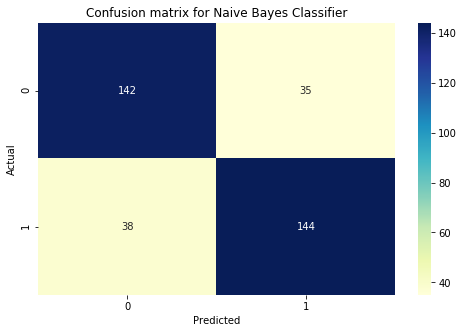

In [135]:
confusion_matrix = cm(y_test, predicted ,[0,4])
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Naive Bayes Classifier')
plt.show()

#### Observations
Label 0 = Negative Tweet <br/>
Label 1 = Positive Tweet
- Accuracy = 57.42%
- F1 Score = 0.69 for Negative class and 0.65 for Positive class
- False Positives = 38
- False Negatives = 35

#### Logistic Regression

In [136]:
final_model= SGDClassifier(loss='log', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
final_model.fit(features_train, y_train)
predicted= final_model.predict(features_test)
accuracy = final_model.score(features_test, y_test)
print(classification_report(predicted,y_test))
error = mean_squared_error(y_test, predicted)
print('Logistic Regression Accuracy',accuracy)
accuracies.append(accuracy)
print('MSE',error)

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       164
           2       0.00      0.00      0.00         0
           4       0.87      0.47      0.61       334

   micro avg       0.55      0.55      0.55       498
   macro avg       0.51      0.40      0.43       498
weighted avg       0.80      0.55      0.64       498

Logistic Regression Accuracy 0.5522088353413654
MSE 3.8152610441767068


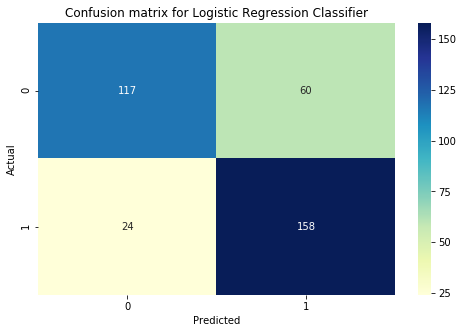

In [137]:
confusion_matrix = cm(y_test, predicted ,[0,4])
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Logistic Regression Classifier')
plt.show()

#### Observations
Label 0 = Negative Tweet <br/>
Label 1 = Positive Tweet
- Accuracy = 55.2%
- F1 Score = 0.69 for Negative class and 0.61 for Positive class
- False Positives = 24
- False Negatives = 60

#### Support Vector Machine

In [138]:

model= SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
model.fit(features_train, y_train)
predicted_svm = model.predict(features_test)
print(classification_report(predicted_svm,y_test))
accuracy = model.score(features_test, y_test)
error = mean_squared_error(y_test, predicted_svm)
print('SVM Accuracy',accuracy)
print('MSE',error)
accuracies.append(accuracy)

              precision    recall  f1-score   support

           0       0.53      0.78      0.63       120
           2       0.00      0.00      0.00         0
           4       0.91      0.44      0.59       378

   micro avg       0.52      0.52      0.52       498
   macro avg       0.48      0.40      0.41       498
weighted avg       0.81      0.52      0.60       498

SVM Accuracy 0.5180722891566265
MSE 4.36144578313253


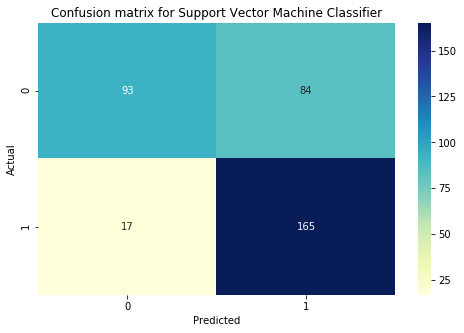

In [139]:
confusion_matrix = cm(y_test, predicted_svm ,[0,4])
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix for Support Vector Machine Classifier')
plt.show()

#### Observations
Label 0 = Negative Tweet <br/>
Label 1 = Positive Tweet
- Accuracy = 51.81%
- F1 Score = 0.63 for Negative class and 0.59 for Positive class
- False Positives = 17
- False Negatives = 84

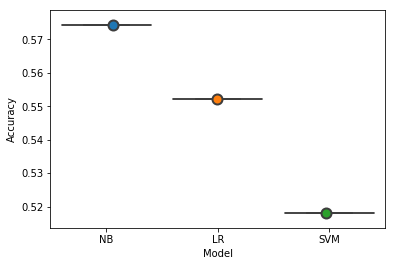

In [140]:
information = {'Model':models, 'Accuracy':accuracies}
data = pd.DataFrame(data=information)
sns.boxplot(x='Model', y='Accuracy', data=data)
sns.stripplot(x='Model', y='Accuracy', data=data, size=10, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

##### TFI-DF with Various Classification Models

- From the above combination of models we can see that Naive Bayes performs the best with TF-IDF features, as the accuracy and the F1 score for this model is the highest amongst the other models.

### Now it's Your Turn

 - There are a lot of techniques to improve the baseline model for sentiment analysis. 
 - Some of the following additional steps can be performed to improve the exsisting baseline model for this dataset:
     - Different types of normalization can be peformed on the whole data including __[stemming and lemmatization](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)__
     - Try keeping the stop words in the dataset instead of removing them since the tweets are already extremely small in size so this might help!
 
 - A bunch of other classification models can be used for this task including neural networks, which require huge amounts of data but they solve the problem of contextual understanding lacking in Bag Of Words and TF-IDF features.